<a href="https://colab.research.google.com/github/Aeoxz/Disease-Prediction/blob/main/UAS_PDM_Revisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import zscore


Load Data

In [ ]:

data = pd.read_csv('/content/Respiratory Symptoms and Treatment (1).csv')
(f'Total rows: {data.shape[0]}')

'Total rows: 38537'

Data cleansing

In [ ]:
# Drop rows with missing values
data = data.dropna()

# Remove outliers using Z-score (threshold = 3)
numerical_columns = ['Age']
for col in numerical_columns:
    z_scores = zscore(data[col])
    data = data[(np.abs(z_scores) < 3)]

# Display total number of rows after removing outliers
print(f'Total rows after removing outliers: {data.shape[0]}')



Total rows after removing outliers: 32724


Encoding

In [ ]:
# Encode categorical data
label_encoders = {}
for column in ['Symptoms', 'Sex', 'Disease', 'Treatment', 'Nature']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

Distribusi umur Berdasarkan Data

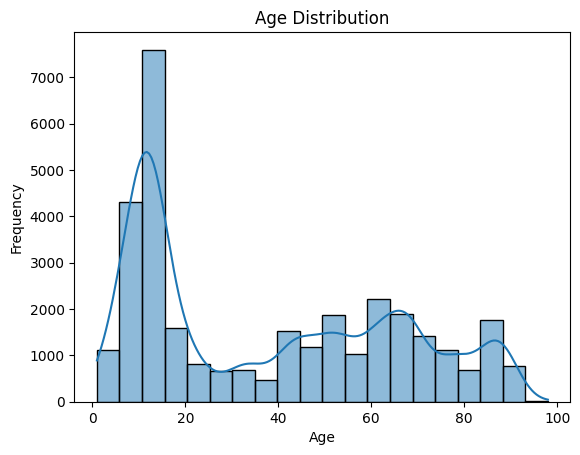

In [ ]:


# Visualize the distribution of age
sns.histplot(data['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Correlation Matrix

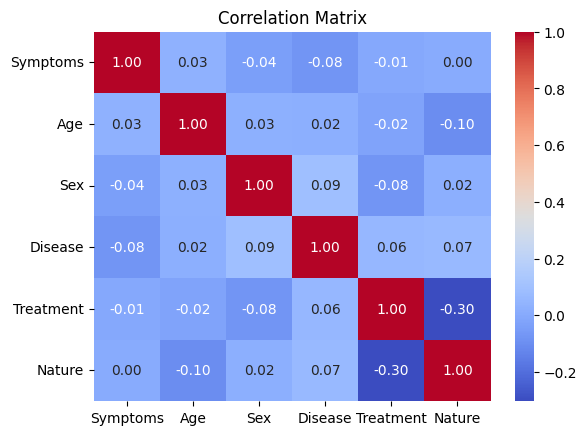

In [ ]:
# Visualize the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Step 3: Feature Selection
X = data[['Symptoms', 'Age', 'Sex', 'Nature']]
# Target variable: Disease
Y = data['Disease']

Data Spliting

In [ ]:
 #Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Scale and Training

In [ ]:
 #Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train  Machine Learning Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

Evaluasi

In [ ]:
#Evaluate the Model
Y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy Score: 0.9673032849503438
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        45
           3       1.00      0.97      0.98       186
           4       1.00      0.98      0.99       337
           5       0.86      1.00      0.93       360
           6       1.00      1.00      1.00       373
           7       0.91      0.91      0.91       637
           8       0.98      0.97      0.98      1055
           9       0.98      0.93      0.95       508
          10       0.96      0.98      0.97       326
          11       1.00      1.00      1.00       101
          12       1.00      1.00      1.00       286
          13       1.00      0.99      1.00       411
          14       0.99      0.97      0.98       876
          15       0.92      0.94      0.93       686
          16       1.0

<ipython-input-21-e604be80f104>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='Blues_d')


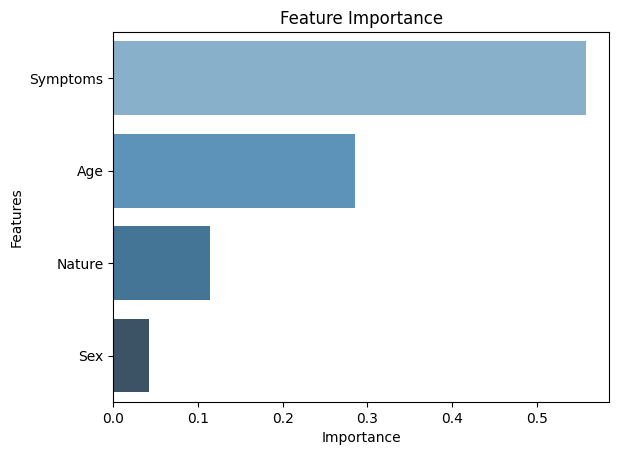

In [ ]:
#Feature Importance
# Extract feature importance and visualize
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_importances, y=feature_importances.index, palette='Blues_d')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

<ipython-input-23-26f2b6d36e61>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_distribution.index, y=disease_distribution.values, palette='Blues_d')


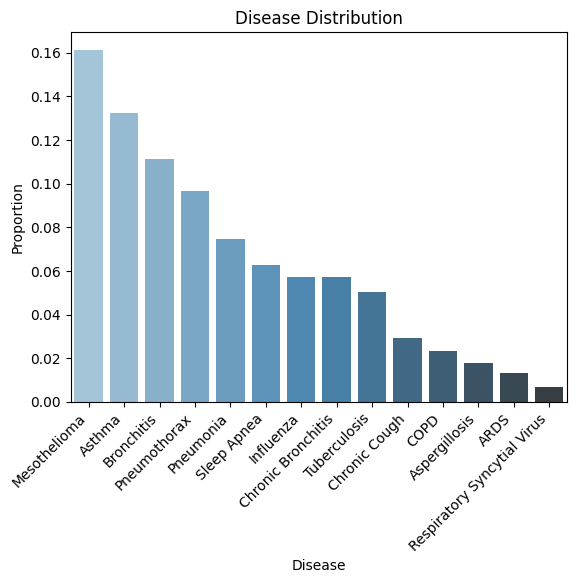

In [ ]:
# Create a fixed disease mapping based on the images
disease_mapping = {
    9: "Pneumonia",
    15: "Bronchitis",
    16: "COPD",
    8: "Mesothelioma",
    7: "Pneumothorax",
    6: "Chronic Bronchitis",
    17: "Pulmonary Fibrosis",
    5: "Influenza",
    4: "Tuberculosis",
    14: "Asthma",
    3: "Chronic Cough",
    13: "Sleep Apnea",
    2: "Respiratory Syncytial Virus",
    1: "ARDS",
    0: "Aspergillosis",
}

# Analyze Disease Distribution
disease_distribution = data['Disease'].value_counts(normalize=True)

# Map the encoded values to disease names for the plot
disease_distribution.index = disease_distribution.index.map(disease_mapping)

sns.barplot(x=disease_distribution.index, y=disease_distribution.values, palette='Blues_d')
plt.title("Disease Distribution")
plt.xlabel("Disease")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
